In [ ]:
import torch

x_train = torch.FloatTensor ([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [ ]:
w = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

In [ ]:
for epoch in range (3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.sigmoid(torch.mm(x_train, w) + b)
  cost = torch.mean(
      -y_train * torch.log(hypothesis)
     -(1 - y_train) * torch.log(1 - hypothesis)
  )

  cost.backward()
  with torch.no_grad() as grd:
    w = w - lr * w.grad
    b = b - lr * b.grad

  if epoch % 300 == 0:
    print( 'epoch : {}, cost: {:.6f}, w: {:.6f}, b: {:.6f}' .format(
        epoch, cost.item(), w.squeeze(), b.squeeze()
    )) 

epoch : 0, cost: 0.693147, w: -0.154167, b: 0.083333
epoch : 300, cost: 0.390820, w: -2.174323, b: 6.609555
epoch : 600, cost: 0.383699, w: -2.620779, b: 7.953164
epoch : 900, cost: 0.382149, w: -2.832521, b: 8.587361
epoch : 1200, cost: 0.381706, w: -2.946401, b: 8.927779
epoch : 1500, cost: 0.381565, w: -3.010968, b: 9.120598
epoch : 1800, cost: 0.381517, w: -3.048561, b: 9.232801
epoch : 2100, cost: 0.381500, w: -3.070766, b: 9.299055
epoch : 2400, cost: 0.381494, w: -3.083992, b: 9.338511
epoch : 2700, cost: 0.381492, w: -3.091908, b: 9.362126
epoch : 3000, cost: 0.381491, w: -3.096662, b: 9.376307


In [ ]:
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, w) + b)
print(torch.round(test_result))
# 4.5 일때 0 ,  1.1 일때 1 이다!

tensor([[0.],
        [1.]])


In [ ]:
optimizer = torch.optim.SGD([w,b] , lr=1.0)
optimizer.zero_grad()
optimizer.step()

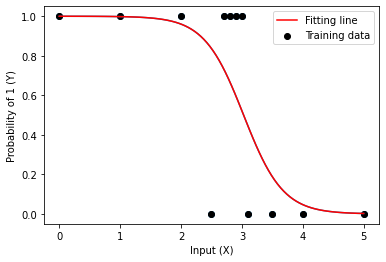

In [ ]:
import matplotlib.pyplot as plt
w.requires_grad_(False)
b.requires_grad_(False)
plt.scatter(x_train, y_train)
X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,w)+b)
plt.plot(X,Y)
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.scatter(x_train, y_train, c="black", label="Training data")
plt.plot(X,Y, c="#ff0000", label="Fitting line")
plt.legend()
plt.show()